## RNN-LSTM Time Series Model
### Task: To predict the 'Open' Price of Google Stock for the next day on the basis of 'Open', 'High', 'Low' and 'Close' prices for the past 14 days.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout, Activation

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
dataset = pd.read_csv('GOOG.csv')

In [5]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-07-28,244.455063,244.455063,236.029846,237.018417,237.018417,6361000
1,2008-07-29,238.101379,242.055664,237.455582,239.994064,239.994064,5642000
2,2008-07-30,241.181351,241.439667,234.877350,239.790390,239.790390,7026600
3,2008-07-31,235.746689,238.891235,234.196777,235.344315,235.344315,5767400
4,2008-08-01,234.728317,235.081024,229.755661,232.418350,232.418350,6054900


In [6]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2513,2018-07-20,1186.959961,1196.859985,1184.219971,1184.910034,1184.910034,1247400
2514,2018-07-23,1181.010010,1206.489990,1181.000000,1205.500000,1205.500000,2619200
2515,2018-07-24,1262.589966,1266.000000,1235.560059,1248.079956,1248.079956,3318200
2516,2018-07-25,1239.130005,1265.859985,1239.130005,1263.699951,1263.699951,2127800
2517,2018-07-26,1251.000000,1269.770996,1249.020020,1268.329956,1268.329956,2403900


In [7]:
dataset.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
dataset['Date'] =  pd.to_datetime(dataset['Date'])

In [9]:
df = dataset.set_index('Date')

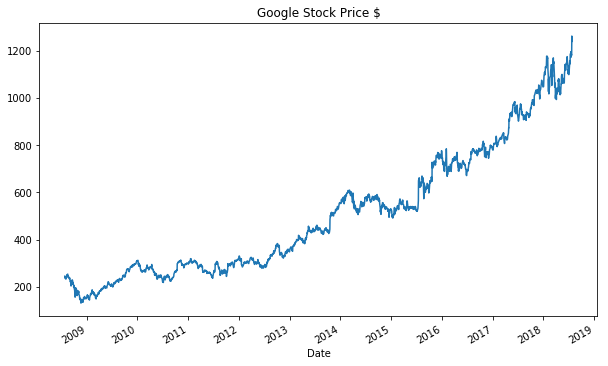

In [10]:
df['Open'].plot(figsize = (10, 6), title = 'Google Stock Price $')

In [11]:
filter_cols = ["Open", "High", "Low", "Close"] # Only these columns will be extracted from the dataset
x_window_size = 14 # timestep for the LSTM model
y_window_size = 1 # The model will predict the price only for the next 1 day
y_column = "Open" # The target variable

In [12]:
counter = 0
nbepochs = 5
batch_size_ = 10
date = pd.DataFrame(columns = ['Date'])

In [13]:
Result = [] # The predicted 'Open' prices
Test = [] # Real 'Open' prices

down = 0
up = 0

In [14]:
l = len(dataset)

### The model input is a moving window of size = 400 rows i.e. the model uses data for 400 days at one time (first 300 rows for training and last 100 rows for testing) before the window moves on. This is done because the Stock Market is very  random. The model need to learn from what happened very recently to predict the future rather than what happened years ago.

**down =  0   **up =  400   ** len(dataset) =  2518


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 4), units=10)`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:64: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 6s 26ms/step - loss: 0.1169 - val_loss: 0.0704
Epoch 2/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0205 - val_loss: 0.0257
Epoch 3/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0118 - val_loss: 0.0165
Epoch 4/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0100 - val_loss: 0.0047
Epoch 5/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0109 - val_loss: 0.0027


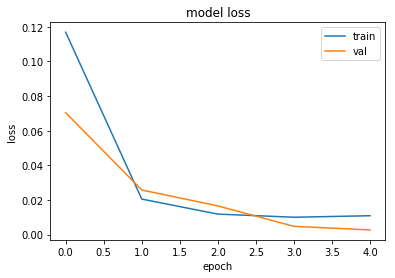

**down =  100   **up =  500   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 3s 12ms/step - loss: 0.0988 - val_loss: 0.0419
Epoch 2/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0172 - val_loss: 0.0243
Epoch 3/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0077 - val_loss: 0.0096
Epoch 4/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0080 - val_loss: 0.0070
Epoch 5/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0063 - val_loss: 0.0059


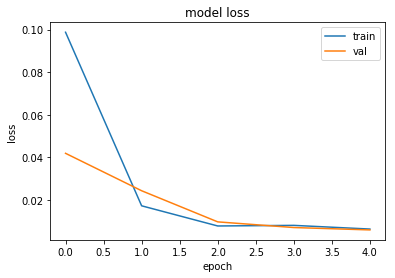

**down =  200   **up =  600   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 3s 13ms/step - loss: 0.0699 - val_loss: 0.0368
Epoch 2/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0151 - val_loss: 0.0215
Epoch 3/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0085 - val_loss: 0.0136
Epoch 4/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0101 - val_loss: 0.0136
Epoch 5/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0084 - val_loss: 0.0119


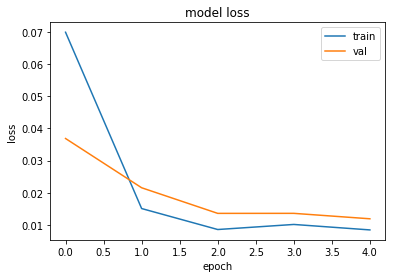

**down =  300   **up =  700   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 3s 13ms/step - loss: 0.0681 - val_loss: 0.0290
Epoch 2/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0260 - val_loss: 0.0263
Epoch 3/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0150 - val_loss: 0.0220
Epoch 4/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0140 - val_loss: 0.0133
Epoch 5/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0123 - val_loss: 0.0177


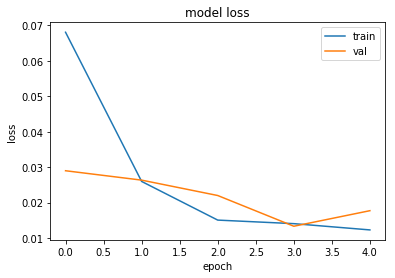

**down =  400   **up =  800   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 3s 14ms/step - loss: 0.0927 - val_loss: 0.0124
Epoch 2/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0206 - val_loss: 0.0129
Epoch 3/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0131 - val_loss: 0.0151
Epoch 4/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0141 - val_loss: 0.0097
Epoch 5/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0130 - val_loss: 0.0094


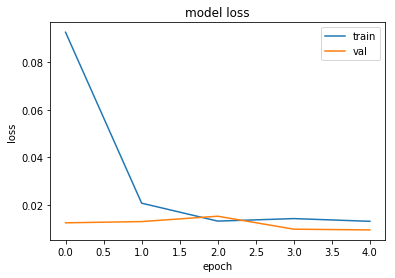

**down =  500   **up =  900   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 3s 15ms/step - loss: 0.1529 - val_loss: 0.0281
Epoch 2/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0290 - val_loss: 0.0257
Epoch 3/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0207 - val_loss: 0.0275
Epoch 4/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0162 - val_loss: 0.0290
Epoch 5/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0157 - val_loss: 0.0279


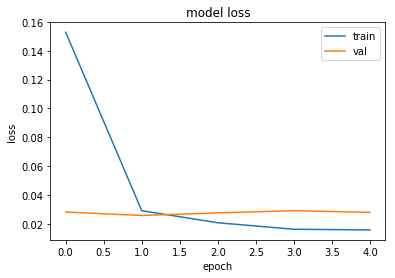

**down =  600   **up =  1000   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 4s 16ms/step - loss: 0.0355 - val_loss: 0.0177
Epoch 2/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0189 - val_loss: 0.0143
Epoch 3/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0146 - val_loss: 0.0121
Epoch 4/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0140 - val_loss: 0.0122
Epoch 5/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0152 - val_loss: 0.0113


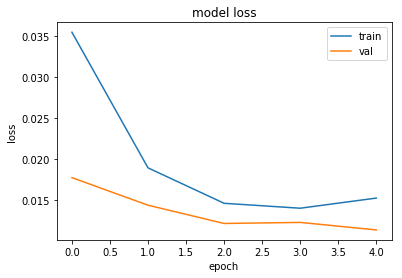

**down =  700   **up =  1100   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 4s 17ms/step - loss: 0.1017 - val_loss: 0.0107
Epoch 2/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0278 - val_loss: 0.0076
Epoch 3/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0245 - val_loss: 0.0074
Epoch 4/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0194 - val_loss: 0.0063
Epoch 5/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0184 - val_loss: 0.0083


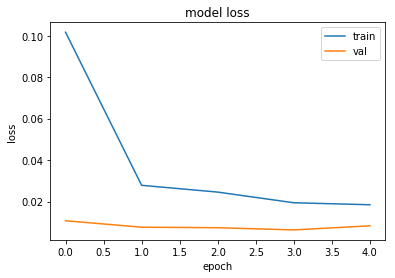

**down =  800   **up =  1200   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 4s 18ms/step - loss: 0.0809 - val_loss: 0.0320
Epoch 2/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0158 - val_loss: 0.0379
Epoch 3/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0119 - val_loss: 0.0296
Epoch 4/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0086 - val_loss: 0.0302
Epoch 5/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0099 - val_loss: 0.0198


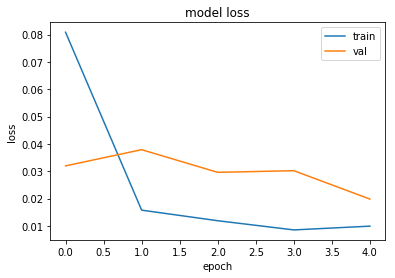

**down =  900   **up =  1300   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 4s 19ms/step - loss: 0.0468 - val_loss: 0.0422
Epoch 2/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0104 - val_loss: 0.0222
Epoch 3/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0090 - val_loss: 0.0117
Epoch 4/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0083 - val_loss: 0.0144
Epoch 5/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0097 - val_loss: 0.0061


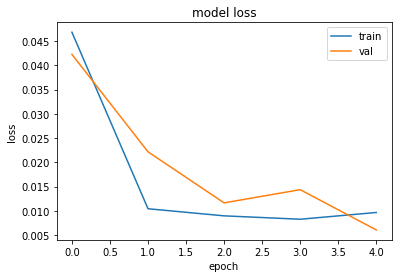

**down =  1000   **up =  1400   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 4s 19ms/step - loss: 0.1077 - val_loss: 0.0226
Epoch 2/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0183 - val_loss: 0.0150
Epoch 3/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0131 - val_loss: 0.0069
Epoch 4/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0099 - val_loss: 0.0027
Epoch 5/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0101 - val_loss: 0.0039


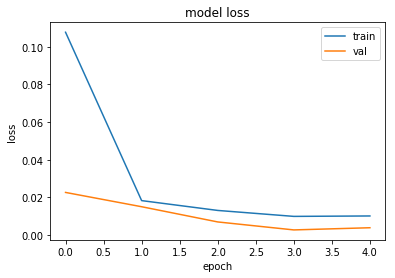

**down =  1100   **up =  1500   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 5s 20ms/step - loss: 0.0509 - val_loss: 0.0751
Epoch 2/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0110 - val_loss: 0.0511
Epoch 3/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0081 - val_loss: 0.0158
Epoch 4/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0062 - val_loss: 0.0141
Epoch 5/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0064 - val_loss: 0.0156


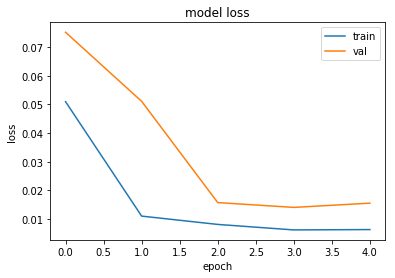

**down =  1200   **up =  1600   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 5s 22ms/step - loss: 0.1523 - val_loss: 0.0136
Epoch 2/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0246 - val_loss: 0.0084
Epoch 3/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0089 - val_loss: 0.0084
Epoch 4/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 5/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0100 - val_loss: 0.0144


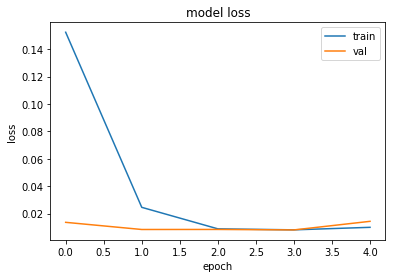

**down =  1300   **up =  1700   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 5s 23ms/step - loss: 0.2102 - val_loss: 0.0110
Epoch 2/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0233 - val_loss: 0.0181
Epoch 3/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0201 - val_loss: 0.0123
Epoch 4/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0174 - val_loss: 0.0132
Epoch 5/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0150 - val_loss: 0.0080


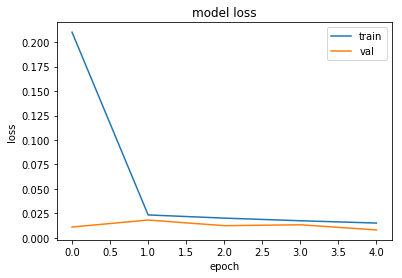

**down =  1400   **up =  1800   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 5s 24ms/step - loss: 0.1152 - val_loss: 0.0107
Epoch 2/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0290 - val_loss: 0.0106
Epoch 3/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0256 - val_loss: 0.0109
Epoch 4/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0201 - val_loss: 0.0111
Epoch 5/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0182 - val_loss: 0.0110


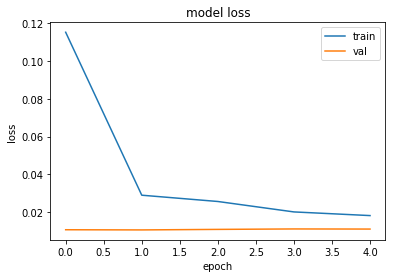

**down =  1500   **up =  1900   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 6s 25ms/step - loss: 0.0352 - val_loss: 0.0976
Epoch 2/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0079 - val_loss: 0.0989
Epoch 3/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0091 - val_loss: 0.0811
Epoch 4/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0072 - val_loss: 0.0632
Epoch 5/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0068 - val_loss: 0.0625


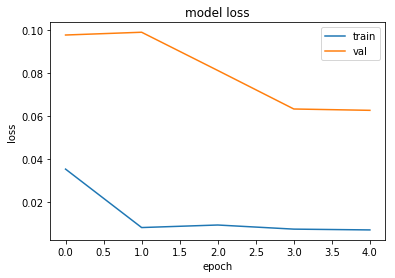

**down =  1600   **up =  2000   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 6s 26ms/step - loss: 0.0288 - val_loss: 0.0267
Epoch 2/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0110 - val_loss: 0.0096
Epoch 3/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0092 - val_loss: 0.0118
Epoch 4/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0089 - val_loss: 0.0091
Epoch 5/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0066 - val_loss: 0.0083


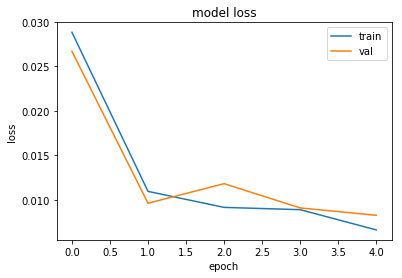

**down =  1700   **up =  2100   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 6s 27ms/step - loss: 0.0457 - val_loss: 0.0049
Epoch 2/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0161 - val_loss: 0.0047
Epoch 3/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0133 - val_loss: 0.0054
Epoch 4/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0130 - val_loss: 0.0073
Epoch 5/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0138 - val_loss: 0.0043


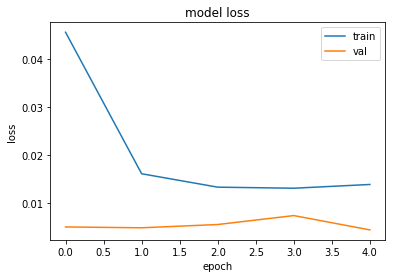

**down =  1800   **up =  2200   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 6s 27ms/step - loss: 0.0899 - val_loss: 0.0133
Epoch 2/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0185 - val_loss: 0.0152
Epoch 3/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0154 - val_loss: 0.0117
Epoch 4/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0142 - val_loss: 0.0160
Epoch 5/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0148 - val_loss: 0.0110


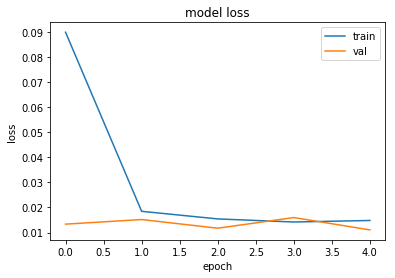

**down =  1900   **up =  2300   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 7s 29ms/step - loss: 0.0686 - val_loss: 0.0409
Epoch 2/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0193 - val_loss: 0.0276
Epoch 3/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0158 - val_loss: 0.0127
Epoch 4/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0140 - val_loss: 0.0086
Epoch 5/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0127 - val_loss: 0.0078


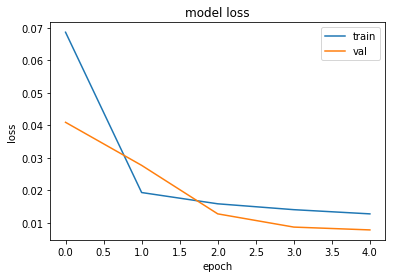

**down =  2000   **up =  2400   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 7s 30ms/step - loss: 0.0493 - val_loss: 0.0246
Epoch 2/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0127 - val_loss: 0.0050
Epoch 3/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0082 - val_loss: 0.0048
Epoch 4/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0066 - val_loss: 0.0039
Epoch 5/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0073 - val_loss: 0.0074


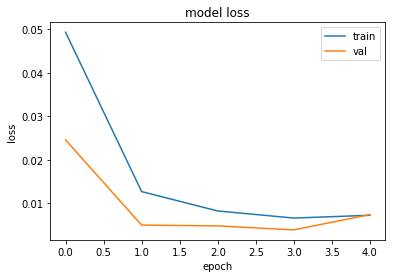

**down =  2100   **up =  2500   ** len(dataset) =  2518
Train on 228 samples, validate on 58 samples
Epoch 1/5
228/228 [==============================] - 7s 30ms/step - loss: 0.0529 - val_loss: 0.0402
Epoch 2/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0096 - val_loss: 0.0330
Epoch 3/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0068 - val_loss: 0.0201
Epoch 4/5
228/228 [==============================] - 1s 5ms/step - loss: 0.0063 - val_loss: 0.0123
Epoch 5/5
228/228 [==============================] - 1s 6ms/step - loss: 0.0054 - val_loss: 0.0170


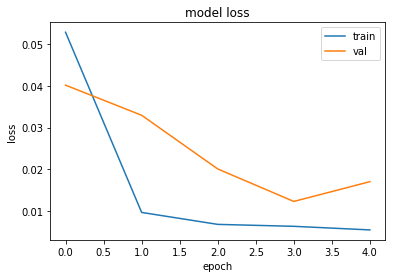

In [15]:
while True:
    
    up = down + 400
    if up > l:
        break
    data = dataset[down:up]
    
    print("**down = ", down, "  **up = ", up, '  ** len(dataset) = ', l)
    
    time = data['Date'][-100:]
    date = pd.concat((date, pd.DataFrame(time)), axis = 0)
    
    if (filter_cols):
        # Remove any columns from data that we don't need by getting the difference between cols and filter list
        rm_cols = set(data.columns) - set(filter_cols)
        for col in rm_cols:
            del data[col]
    
    # Convert y-predict column name to numerical index
    y_col = list(data.columns).index(y_column)
    
    x_train = data[:-100]
    x_test = data[-100:]
    y_test = data['Close'][-100:]
    
    x_col = x_train.columns
    
    sc_X = MinMaxScaler(feature_range=(0, 1))
    x_train = sc_X.fit_transform(x_train)
    x_test = sc_X.transform(x_test)
    
    sc_Y = MinMaxScaler(feature_range=(0, 1))
    sc_Y.fit(np.array(y_test).reshape(-1,1))
    
    x_train = pd.DataFrame(data=x_train, columns=x_col)
    x_test = pd.DataFrame(data=x_test, columns=x_col)
    y_test_scaled = x_test['Close'][-100:]
    
    num_rows = len(x_train)
    x_data = []
    y_data = []
    i = 0
    while ((i + x_window_size + y_window_size) <= num_rows):
        x_window_data = x_train[i:(i + x_window_size)]
        y_window_data = x_train[(i + x_window_size):(i + x_window_size + y_window_size)]
        
        y_average = np.average(y_window_data.values[:, y_col])
        x_data.append(x_window_data.values)
        y_data.append(y_average)
        i += 1
        
    x_np_arr = np.array(x_data) # 3D input tensor with shape = (286, 14, 4)
    y_np_arr = np.array(y_data)
    
    
    #-------------------------------------------------------------------------------------
    
    
    model = Sequential()
    model.add(LSTM(input_dim = x_np_arr.shape[2], output_dim=10, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(x_np_arr.shape[1], return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim = 1))
    model.add(Activation("tanh"))
    model.compile(loss = "mse", optimizer = "Nadam")
    counter = 1
    
    history = model.fit(x_np_arr, y_np_arr, validation_split = 0.2, epochs = nbepochs, batch_size = batch_size_)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss']) #RAISE ERROR
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()
    
    dataset_total = pd.concat((x_train, x_test), axis = 0)
    test = dataset_total[-100-x_window_size+1:]
    
    num_rows = len(test)
    x_data = []
    i = 0
    while ((i + x_window_size) <= num_rows):
        test_window = test[i:(i + x_window_size)]
        x_data.append(test_window.values)
        i += 1
        
    x_test_arr = np.array(x_data) # 3D tensor with shape = (100, 14, 4)
    
    predicted_price = model.predict(x_test_arr)
    predicted_price = sc_Y.inverse_transform(predicted_price)
    #------------------------------------------------------------------------------
    
    Result = np.concatenate((Result, predicted_price.reshape(-1)), axis = 0)
    Test = np.concatenate((Test, y_test), axis = 0)
    down = down + 100

In [18]:
Predited_Stock_Price = pd.DataFrame(data = Result, columns = ['Predicted_Price'])
Real_Stock_Price = pd.DataFrame(data = Test, columns = ['Real_Price'])
Predited_Stock_Price = pd.concat((Predited_Stock_Price, date.reset_index(drop = True)), axis = 1)
Real_Stock_Price = pd.concat((Real_Stock_Price, date.reset_index(drop = True)), axis = 1)
Predited_Stock_Price.set_index('Date', inplace = True)
Real_Stock_Price.set_index('Date', inplace = True)

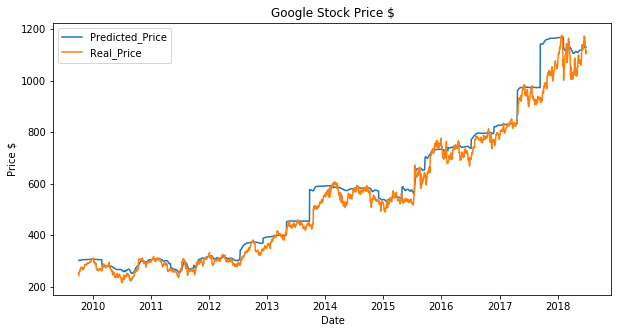

In [20]:
plt.figure(figsize = (10,5))
plt.plot(Predited_Stock_Price['Predicted_Price'])
plt.plot(Real_Stock_Price['Real_Price'])
plt.xlabel('Date')
plt.ylabel('Price $')
plt.title('Google Stock Price $')
plt.legend()
plt.show()